In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data= pd.read_csv("/Users/naweedahmed/Desktop/Flatiron_Feb/capstone_project/dsc-capstone-submission-checklist/Data/data_final.csv")

In [7]:
data.head()

,Date,index,age,job,marital,education,default,housing,loan,contact,...,MOM Inflation,Wage Growth,EURUSD,euro zoneGDP Growth Rate,Portugal Income Tax annual rate,Portugal Bank Lending Rate,Portugal Personal Savings,Portugal Wages,Portugal Unemployment Rate,Portugal Sales Tax
0,2008-05-29,0,56,housemaid,married,basic.4y,no,no,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
1,2008-05-29,1,57,services,married,high.school,unknown,no,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
2,2008-05-29,2,37,services,married,high.school,no,yes,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
3,2008-05-29,3,40,admin.,married,basic.6y,no,no,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
4,2008-05-29,4,56,services,married,high.school,no,no,yes,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0


In [8]:
data.set_index('Date', inplace=True)

In [9]:
data.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [10]:
data.loc[(data['month']=='mar'),'month_nos'] = 3
data.loc[(data['month']=='apr'),'month_nos'] = 4
data.loc[(data['month']=='may'),'month_nos'] = 5
data.loc[(data['month']=='jun'),'month_nos'] = 6
data.loc[(data['month']=='jul'),'month_nos'] = 7
data.loc[(data['month']=='aug'),'month_nos'] = 8
data.loc[(data['month']=='sep'),'month_nos'] = 9
data.loc[(data['month']=='oct'),'month_nos'] = 10
data.loc[(data['month']=='nov'),'month_nos'] = 11
data.loc[(data['month']=='dec'),'month_nos'] = 12

In [11]:
data.month_nos.unique()

array([ 5.,  6.,  7.,  8., 10., 11., 12.,  3.,  4.,  9.])

In [12]:
data.sort_values(by='month_nos', ascending=True, inplace=True)

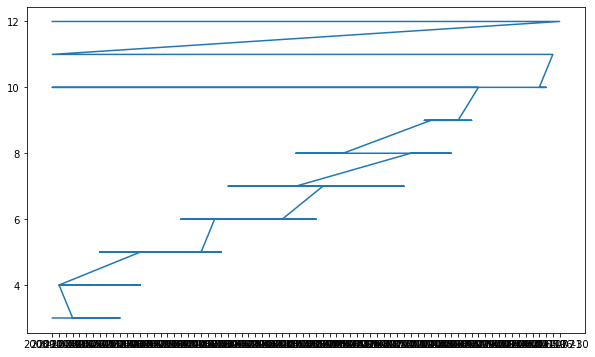

In [13]:
plt.figure(figsize=(10,6))
plt.plot(data['month_nos'])

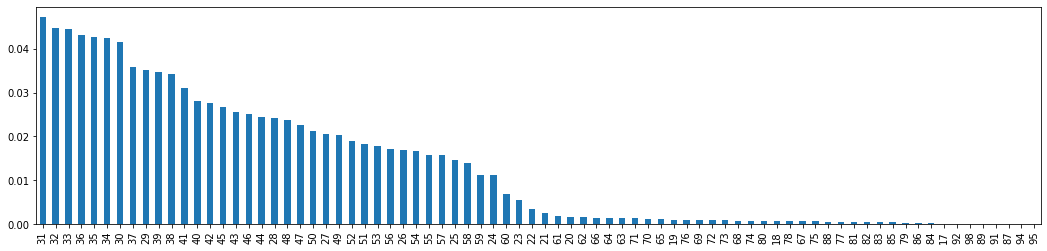

In [15]:
data['age'].value_counts(normalize=True).plot(kind='bar', figsize=(18, 4));

In [18]:
data.columns

Index(['index', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'MOM Inflation',
       'Wage Growth', 'EURUSD', 'euro zoneGDP Growth Rate',
       'Portugal Income Tax annual rate', 'Portugal Bank Lending Rate',
       'Portugal Personal Savings', 'Portugal Wages',
       'Portugal Unemployment Rate', 'Portugal Sales Tax', 'month_nos'],
      dtype='object')

In [20]:
data.loc[((data['age'] >= 16 ) & (data['age'] <= 24 )), 'Age_Group'] = '16-24'
data.loc[((data['age'] >= 25 ) & (data['age'] <= 34 )), 'Age_Group'] = '25-34'
data.loc[((data['age'] >= 35 ) & (data['age'] <= 44 )), 'Age_Group'] = '35-44'
data.loc[((data['age'] >= 45 ) & (data['age'] <= 54 )), 'Age_Group'] = '45-54'
data.loc[((data['age'] >= 55 ) & (data['age'] <= 64 )), 'Age_Group'] = '55-64'
data.loc[((data['age'] >= 65 ) & (data['age'] <= 74 )), 'Age_Group'] = '65-74'
data.loc[((data['age'] >= 75 ) & (data['age'] <= 79 )), 'Age_Group'] = '75-79'
data.loc[((data['age'] >= 80 )), 'Age_Group'] = '80+'

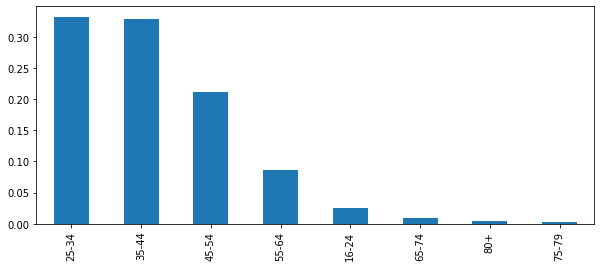

In [22]:
data['Age_Group'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 4));

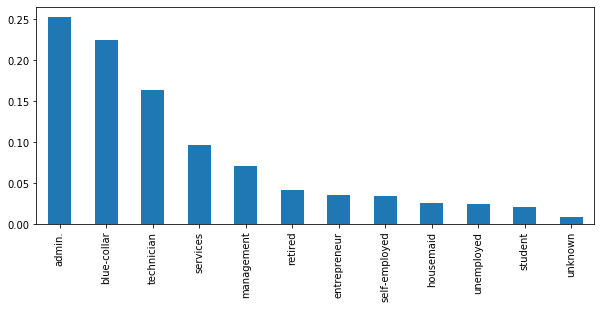

In [23]:
data['job'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 4));

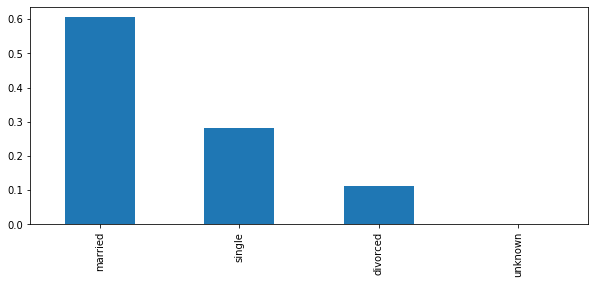

In [24]:
data['marital'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 4));

In [28]:
data.columns

Index(['index', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'MOM Inflation',
       'Wage Growth', 'EURUSD', 'euro zoneGDP Growth Rate',
       'Portugal Income Tax annual rate', 'Portugal Bank Lending Rate',
       'Portugal Personal Savings', 'Portugal Wages',
       'Portugal Unemployment Rate', 'Portugal Sales Tax', 'month_nos',
       'Age_Group'],
      dtype='object')

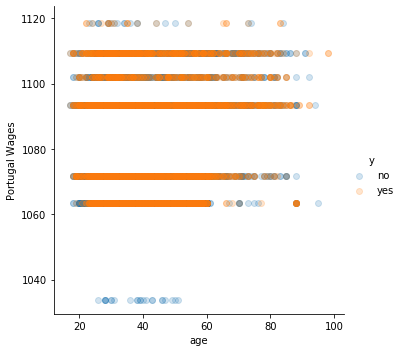

In [30]:
sns.lmplot(x="age", y="Portugal Wages",data = data,
                     hue = "y",fit_reg=False,  scatter_kws={'alpha':0.2}
                     )

In [34]:
data.groupby('job').mean()

,index,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,Wage Growth,EURUSD,euro zoneGDP Growth Rate,Portugal Income Tax annual rate,Portugal Bank Lending Rate,Portugal Personal Savings,Portugal Wages,Portugal Unemployment Rate,Portugal Sales Tax,month_nos
job,,,,,,,,,,,,,,,,,,,,,
admin.,21888.241604,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,...,2.361169,1.441002,-0.589263,42.163903,7.098167,6.522692,1069.924266,7.914383,20.042026,6.776243
blue-collar,17943.856819,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,...,3.399978,1.448896,-0.682937,42.036244,7.208915,6.315280,1066.680414,7.796920,20.009293,6.088286
entrepreneur,19219.407280,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,...,3.567376,1.429015,-0.595055,42.058929,7.303420,6.283585,1067.106813,7.787912,20.015110,6.796703
housemaid,18642.689623,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,...,2.608302,1.466748,-0.280755,42.143491,7.310792,6.289811,1068.413160,7.753491,20.036792,6.805660
management,21013.031806,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,...,3.103078,1.427407,-0.527531,42.142715,7.203232,6.472880,1068.923003,7.885363,20.036594,6.994186
retired,26086.565698,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,...,1.096395,1.430305,-0.246686,42.526047,6.620494,7.502035,1078.231622,8.372442,20.134884,7.019767
self-employed,20723.339198,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,...,2.830260,1.437790,-0.529838,42.153695,7.213040,6.404645,1068.791288,7.850246,20.039409,6.793103
services,18930.184681,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,...,3.221819,1.446580,-0.661275,42.063870,7.178692,6.375334,1067.406808,7.828193,20.016377,6.222474
student,30844.699429,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,...,0.621486,1.395052,-0.719086,42.503657,6.144491,8.113486,1082.128800,8.711657,20.129143,6.597714


In [36]:
data.groupby('Age_Group').mean()

,index,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,Wage Growth,EURUSD,euro zoneGDP Growth Rate,Portugal Income Tax annual rate,Portugal Bank Lending Rate,Portugal Personal Savings,Portugal Wages,Portugal Unemployment Rate,Portugal Sales Tax,month_nos
Age_Group,,,,,,,,,,,,,,,,,,,,,
16-24,27089.438202,22.615169,278.228464,2.321161,894.932584,0.368914,-0.828184,93.440772,-41.340918,2.524922,...,1.148876,1.413690,-0.886423,42.303090,6.491030,7.386423,1076.503755,8.366011,20.077715,6.309925
25-34,21677.964782,30.462370,259.030615,2.532077,962.583881,0.177188,-0.022717,93.541217,-40.922753,3.481400,...,2.593877,1.436425,-0.726290,42.121109,7.067411,6.530659,1069.398280,7.928957,20.031054,6.549832
35-44,19132.782370,38.976667,256.228889,2.589852,973.477926,0.146741,0.197452,93.609116,-40.676481,3.760269,...,3.119074,1.445883,-0.553681,42.086378,7.224573,6.351222,1067.650345,7.809044,20.022148,6.488519
45-54,18993.206572,49.084444,254.710823,2.640395,972.071921,0.142004,0.353906,93.626069,-40.120278,3.945488,...,2.934639,1.454334,-0.441245,42.099023,7.322896,6.219106,1067.440993,7.743176,20.025391,6.759881
55-64,20800.868517,57.471545,262.128680,2.620690,949.426128,0.179422,0.108354,93.584521,-39.617550,3.672307,...,2.312616,1.450148,-0.385786,42.212111,7.142321,6.531371,1070.260050,7.891057,20.054387,6.849453
65-74,37322.822335,69.302030,278.335025,2.068528,809.972081,0.596447,-2.403807,93.065467,-36.630711,0.920112,...,-1.281472,1.376422,-0.010914,43.187817,5.542741,9.493147,1094.335787,9.380203,20.304569,7.510152
75-79,37911.151261,76.773109,289.588235,1.890756,773.529412,0.865546,-2.398319,93.158437,-36.152941,0.870361,...,-1.110924,1.389187,-0.015126,43.147059,5.478655,9.539496,1095.085462,9.428571,20.294118,7.453782
80+,37107.886667,83.946667,271.806667,1.920000,747.200000,0.733333,-2.212667,93.204087,-37.402000,0.935253,...,-0.464667,1.368104,-0.129333,43.300000,5.673000,9.461333,1093.122333,9.398667,20.333333,7.166667


In [44]:
data_age = data.groupby('Age_Group').count().reset_index()

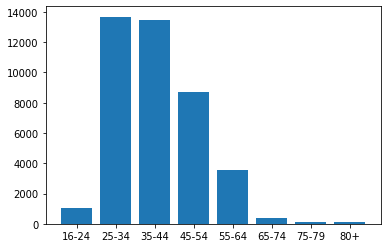

In [50]:
plt.bar(data_age['Age_Group'],data_age['y'])
plt.show()

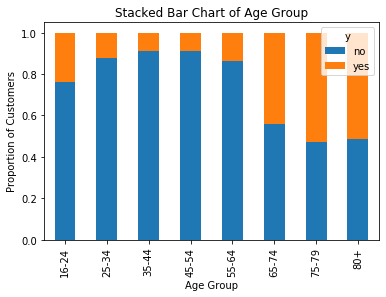

In [99]:
table=pd.crosstab(data.Age_Group,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.title('Stacked Bar Chart of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Customers')
plt.show()

Text(0, 0.5, 'Proportion of Customers')

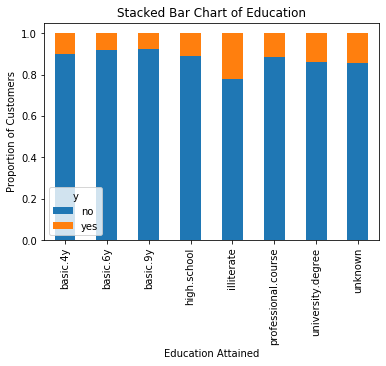

In [101]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education')
plt.xlabel('Education Attained')
plt.ylabel('Proportion of Customers')

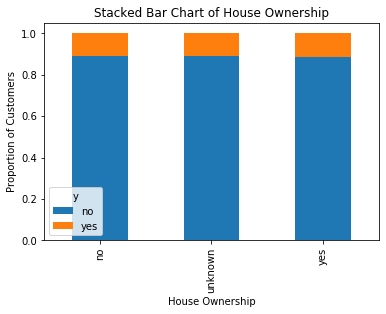

In [103]:
table=pd.crosstab(data.housing,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of House Ownership')
plt.xlabel('House Ownership')
plt.ylabel('Proportion of Customers')
plt.show()

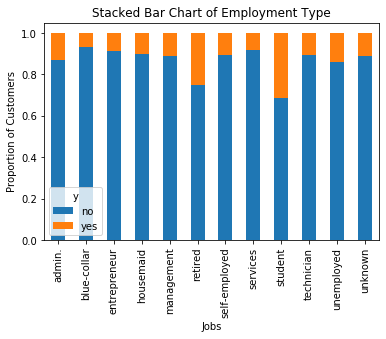

In [104]:
table=pd.crosstab(data.job,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Employment Type')
plt.xlabel('Jobs')
plt.ylabel('Proportion of Customers')
plt.show()

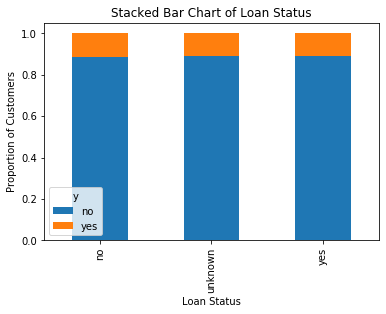

In [105]:
table=pd.crosstab(data.loan,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Proportion of Customers')
plt.show()

In [64]:
bank_month = data.groupby('month').agg(Counts=('month','count')).reset_index()

In [65]:
bank_month['month'].replace('jan', 1, inplace=True)
bank_month['month'].replace('feb', 2, inplace=True)
bank_month['month'].replace('mar', 3, inplace=True)
bank_month['month'].replace('apr', 4, inplace=True)
bank_month['month'].replace('may', 5, inplace=True)
bank_month['month'].replace('jun', 6, inplace=True)
bank_month['month'].replace('jul', 7, inplace=True)
bank_month['month'].replace('aug', 8, inplace=True)
bank_month['month'].replace('sep', 9, inplace=True)
bank_month['month'].replace('oct', 10, inplace=True)
bank_month['month'].replace('nov', 11, inplace=True)
bank_month['month'].replace('dec', 12, inplace=True)

In [66]:
bank_month.sort_values(by='month',ascending=True, inplace=True)

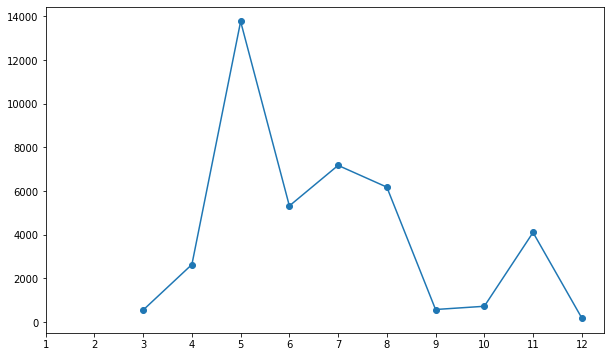

In [67]:
plt.figure(figsize=(10,6))
plt.plot(bank_month['month'], bank_month['Counts'], marker='o')
plt.xticks(range(1,13))
plt.show()

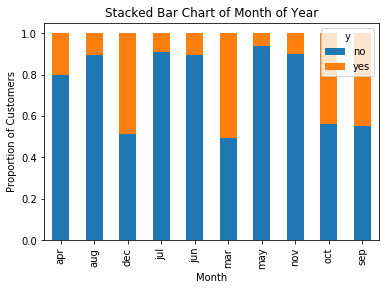

In [106]:
table=pd.crosstab(data.month,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Month of Year')
plt.xlabel('Month')
plt.ylabel('Proportion of Customers')
plt.show()

In [70]:
bank_day = data.groupby('day_of_week').agg(Counts=('day_of_week','count')).reset_index()

In [77]:
bank_day.loc[bank_day['day_of_week']=='mon','index_col']=1
bank_day.loc[bank_day['day_of_week']=='tue','index_col']=2
bank_day.loc[bank_day['day_of_week']=='wed','index_col']=3
bank_day.loc[bank_day['day_of_week']=='thu','index_col']=4
bank_day.loc[bank_day['day_of_week']=='fri','index_col']=5

In [85]:
bank_day.sort_values('index_col',ascending=True, inplace=True)

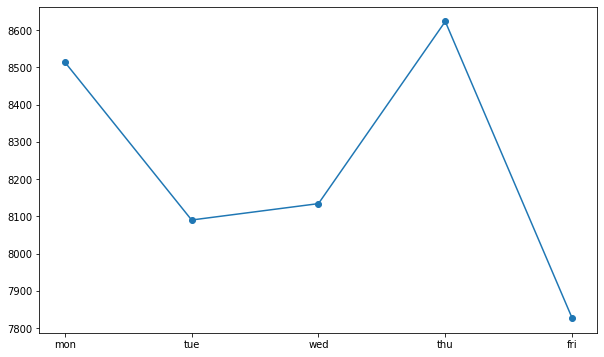

In [89]:
plt.figure(figsize=(10,6))
plt.plot(bank_day['day_of_week'], bank_day['Counts'], marker='o')

plt.show()

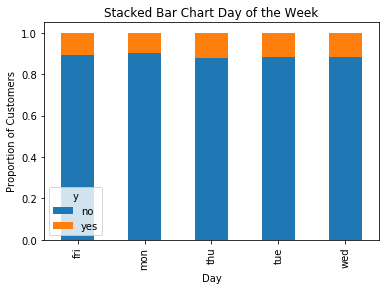

In [107]:
table=pd.crosstab(data.day_of_week,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart Day of the Week')
plt.xlabel('Day')
plt.ylabel('Proportion of Customers')
plt.show()

In [57]:
data.columns

Index(['index', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'MOM Inflation',
       'Wage Growth', 'EURUSD', 'euro zoneGDP Growth Rate',
       'Portugal Income Tax annual rate', 'Portugal Bank Lending Rate',
       'Portugal Personal Savings', 'Portugal Wages',
       'Portugal Unemployment Rate', 'Portugal Sales Tax', 'month_nos',
       'Age_Group'],
      dtype='object')

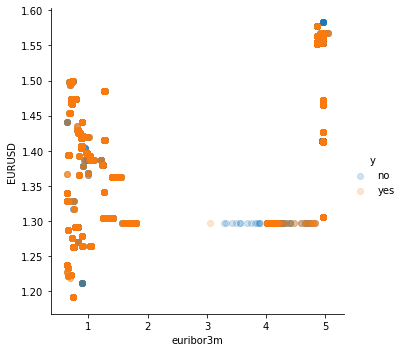

In [61]:
sns.lmplot(x="euribor3m", y="EURUSD",data = data,
                     hue = "y",fit_reg=False,  scatter_kws={'alpha':0.2}
                     )